In [4]:
from __future__ import division
from __future__ import print_function

import os

from myhdl import *
from support import vcd

from test_01_mex import stimulator
from test_01_mex import test

%matplotlib inline

# MyHDL Function (module)
An [introductory MyHDL tutorial](http://www.fpgarelated.com/showarticle/25.php) presents a small example towards the begining of the post.  A MyHDL anatomy graphic (see below) is used to describe the parts of a MyHDL module.  Note, the nomenclature is a little odd here, in Python a module is a file and in MyHDL a module (typically sometimes called a component) is a Python function that describes a set of hardware behavior.  Hardware module is commonly used to name an HDL component in a digital circuit - the use has been propagated forward.

<center><figure>
<a href="https://www.flickr.com/photos/79765478@N08/14230879911" title="myhdl_module_anatomy by cfelton*, on Flickr"><img src="https://farm3.staticflickr.com/2932/14230879911_03ce54dcde_z.jpg" width="640" height="322" alt="myhdl_module_anatomy"></a>
<caption> MyHDL Module Anatomy </caption>
</figure></center>


# A Shift Register
<!-- there is an assumption the user will know what a shift register is, these exercises are for people that know Verilog/VHDL.  Not teaching digital logic from scratch !! -->
What exactly does a shift register do?  In the exercise description section there is a link to a short video describing a shift register.  Basically, to generate a shift register all we really need is a description of what the expected behavior is.  In this case we have a parallel value, `load_value`, that will be serialized to a single bit, the following table shows the temporal behavior.  If we have an constrained integer with a maximum value of 256, the following will be the behavior:
   
    Time | load | ival (d) | ival (b)  | obit
    -----+------+----------+-----------+-----
    T0   | 1    |  32      | 0000_0000 | 0
    T1   | 0    |  X       | 0010_0000 | 0
    T2   | 0    |  X       | 0100_0000 | 0
    T3   | 0    |  X       | 1000_0000 | 1
    T4   | 0    |  X       | 0000_0001 | 0
    T5   | 0    |  X       | 0000_0010 | 0

In the above table abbreviations are used for the `Signal`s listed in the module.

   * ival: `initial_value`
   * obit: `output_bit`


## Exercise Description
This exercise is to implement the shift register shown with the following additions:

1.  Make the shift register circular
2.  Add an inital condition parameter `initial_value`

To make the the [shift register](https://www.youtube.com/watch?v=aAm96cCZ76g)(YouTube) circular connect the most-significant-bit (msb) to the least-significant-bit (lsb).

Sections from the MyHDL manual that may be useful:

1. [Bit indexing and slicing](http://docs.myhdl.org/en/latest/manual/hwtypes.html#bit-indexing)
2. [Signals](http://docs.myhdl.org/en/stable/manual/intro.html#signals-ports-and-concurrency), [Why Signal Assignments](http://www.jandecaluwe.com/hdldesign/signal-assignments.html)
3. [The concat function](http://docs.myhdl.org/en/latest/manual/reference.html?highlight=concat#myhdl.concat) 

Fill in the body of the following and then run the test cell.

### Hints

1.  An internal signal will be used to represent the shift register.  The width (max value) of the register is determined by the type of `load_value`.

In [5]:
def shifty(clock, reset, load, load_value, output_bit, initial_value=0):
    """
    Ports:
       load: input, load strobe, load the `load_value`
       load_value: input, the value to be loaded
       output_bit: output, The most significant 
       initial_value: internal shift registers initial value (value after reset)
    """
    assert isinstance(load_value.val, intbv)
    
    # the internal shift register will be the same sizes as the `load_value`
    shiftreg = Signal(intbv(initial_value, 
                            min=load_value.min, max=load_value.max))
    mask = shiftreg.max-1
    
    # non-working template
    @always_seq(clock.posedge, reset=reset)
    def beh():
        output_bit.next = shiftreg[0]
        
    # for monitoring, access outside this function
    shifty.shiftreg = shiftreg
    
    return beh


The following function will *stimulate* the above MyHDL module.  The `stimulator` all exercise the module in the same way whereas the verification (`test`) will use random values for testing and test numerous cycles.  The cell after the `stimulator` is a cell that plots the waveform of the `stimulator`.  Waring, the embedded VCD waveform plotter is **beta** and very limited.  It is useful for very simple waveforms.  For full waveform viewing use an external tool such as gtkwave.

In [6]:
stimulator(shifty)

Last 20 clock cycles
 sim step | load      | load_val~ | output_b~ | shiftreg  | 
 75       |        0  | 00000000  |        0  | 00000080  | 
 85       |        0  | 00000000  |        0  | 00000080  | 
 95       |        0  | 00000000  |        0  | 00000080  | 
 105      |        1  | 00000001  |        0  | 00000080  | 
 115      |        0  | 00000001  |        0  | 00000080  | 
 125      |        0  | 00000001  |        0  | 00000080  | 
 135      |        0  | 00000001  |        0  | 00000080  | 
 145      |        0  | 00000001  |        0  | 00000080  | 
 155      |        0  | 00000001  |        0  | 00000080  | 
 165      |        0  | 00000001  |        0  | 00000080  | 
 175      |        0  | 00000001  |        0  | 00000080  | 
 185      |        0  | 00000001  |        0  | 00000080  | 
 195      |        0  | 00000001  |        0  | 00000080  | 
 205      |        0  | 00000001  |        0  | 00000080  | 
 215      |        0  | 00000001  |        0  | 00000080  | 
 22

(<matplotlib.figure.Figure at 0x74e3978>,
 <matplotlib.axes._subplots.AxesSubplot at 0x74f4ef0>)

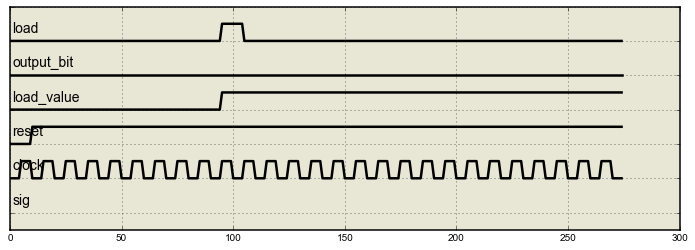

In [7]:
# Note, the following waveform plotter is experimental.  Using 
# an external waveform viewer, like gtkwave, would be useful.
vcd.parse_and_plot('vcd/01_mex_stim.vcd')

After the above `shifty` implementation has been coded, run the next cell to test and verify the behavior of the described digital circuit.  If the test fails it will print out a number of simuilation steps and some values.  The VCD file can be displayed via the `vcd.parse_and_plot('vcd/01_mex_test.vcd')` function (same as above and the same basic waveforms warning) for debug or use an eternal waveform viewer (e.g. gtkwave) to view the simulation waveform and debug. 

In [8]:
test(shifty)

Test Error
Last 6 clock cycles
 sim step | load      | load_val~ | output_b~ | shiftreg  | 
 5        |        0  | 00000000  |        0  | 000000A9  | 
 15       |        0  | 00000000  |        0  | 000000A9  | 
 25       |        0  | 00000000  |        1  | 000000A9  | 
 35       |        0  | 00000000  |        1  | 000000A9  | 
 45       |        0  | 00000000  |        1  | 000000A9  | 
 55       |        0  | 00000000  |        1  | 000000A9  | 
initial_value output bit check failed, expected True got False
    initial_value    A9
    cycle (# shifts) 0



In [9]:
# View the generated VHDL
%less output/shifty.vhd

In [ ]:
# View the generated Verilog
%less output/shifty.v